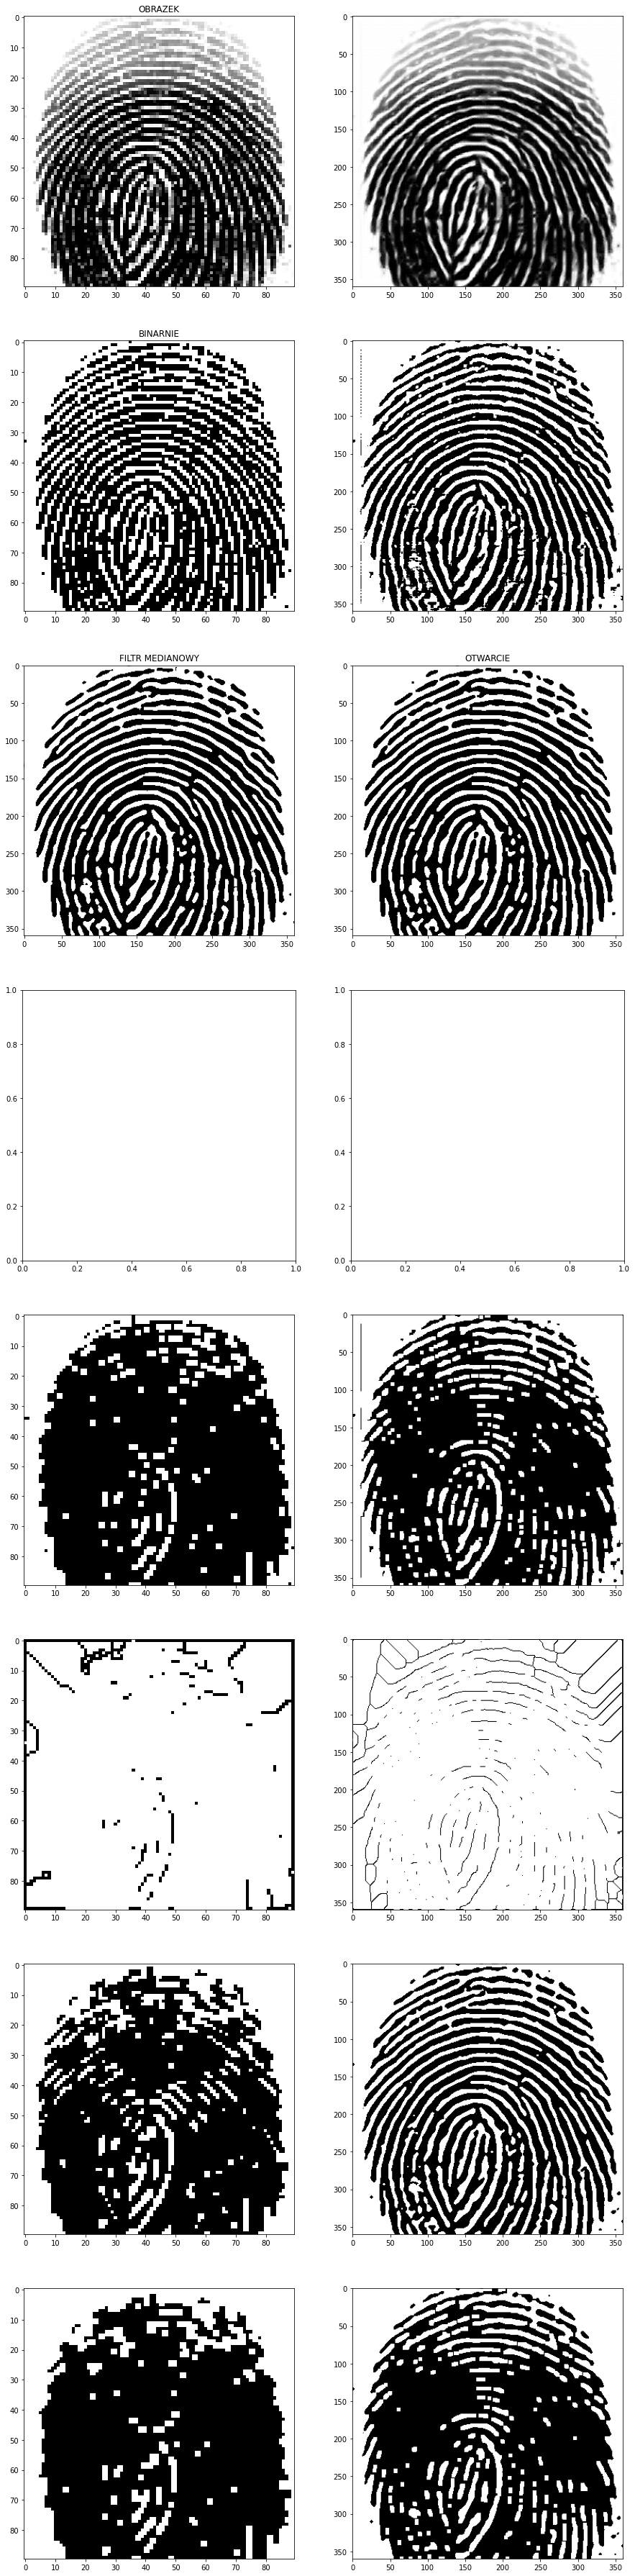

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# https://python.tutorialink.com/module-cv2-cv2-has-no-attribute-dnn_superres/
# pip3 install opencv-contrib-python
import cv2
from cv2 import dnn_superres

# Create an SR object
sr = dnn_superres.DnnSuperResImpl_create()

# Read the desired model
path = "..\\..\\..\\modele\\"
file = "FSRCNN_x4.pb"
sr.readModel(path+file)

# Set the desired model and scale to get correct pre- and post-processing
sr.setModel("fsrcnn", 4)

# Read image
image_path = "..\\..\\..\\..\\DATABASES\\SOCOFing\\Real\\1__M_Left_index_finger.BMP"
image = cv2.imread(image_path, 0)[8:98, 2:92]

# Upscale the image
result = sr.upsample(image)


fig, axs = plt.subplots(8, 2, figsize=(15,65))

axs[0][0].set_title("OBRAZEK")
axs[0][0].imshow(image, cmap='gray')
axs[0][1].imshow(result, cmap='gray')

image_at = ~cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 25, 5)
result_at = ~cv2.adaptiveThreshold(result, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 25, 5)

axs[1][0].set_title("BINARNIE")
axs[1][0].imshow(image_at, cmap='binary')
axs[1][1].imshow(result_at, cmap='binary')

result_median = cv2.medianBlur(result_at, 7)

axs[2][0].set_title("FILTR MEDIANOWY")
axs[2][0].imshow(result_median, cmap='binary')

kernel = np.ones((3,3),np.uint8)
result_median_closing = cv2.morphologyEx(result_median, cv2.MORPH_OPEN, kernel)

axs[2][1].set_title("OTWARCIE")
axs[2][1].imshow(result_median_closing, cmap='binary')




# image_otsu = cv2.threshold(image, 128, 255, cv2.THRESH_OTSU)[1]
# result_otsu = cv2.threshold(result, 128, 255, cv2.THRESH_OTSU)[1]

# axs[2][0].imshow(image_otsu, cmap='binary')
# axs[2][1].imshow(result_otsu, cmap='binary')


# image_at_t = cv2.ximgproc.thinning(~image_at)
# result_at_t = cv2.ximgproc.thinning(~result_at)

# axs[3][0].imshow(image_at_t, cmap='binary')
# axs[3][1].imshow(result_at_t, cmap='binary')

kernel2 = np.ones((2,2),np.uint8)
kernel = np.ones((5,5),np.uint8)
image_closing = cv2.morphologyEx(image_at, cv2.MORPH_CLOSE, kernel2)
result_closing = cv2.morphologyEx(result_at, cv2.MORPH_CLOSE, kernel)

axs[4][0].imshow(image_closing, cmap='binary')
axs[4][1].imshow(result_closing, cmap='binary')

image_closing_t = cv2.ximgproc.thinning(~image_closing)
result_closing_t = cv2.ximgproc.thinning(~result_closing)

axs[5][0].imshow(image_closing_t, cmap='binary')
axs[5][1].imshow(result_closing_t, cmap='binary')

image_median = cv2.medianBlur(image_at, 3)
result_median = cv2.medianBlur(result_at, 5)

axs[6][0].imshow(image_median, cmap='binary')
axs[6][1].imshow(result_median, cmap='binary')

kernel2 = np.ones((2,2),np.uint8)
kernel = np.ones((5,5),np.uint8)
image_median_closing = cv2.morphologyEx(image_median, cv2.MORPH_CLOSE, kernel2)
result_median_closing = cv2.morphologyEx(result_median, cv2.MORPH_CLOSE, kernel)

axs[7][0].imshow(image_median_closing, cmap='binary')
axs[7][1].imshow(result_median_closing, cmap='binary')


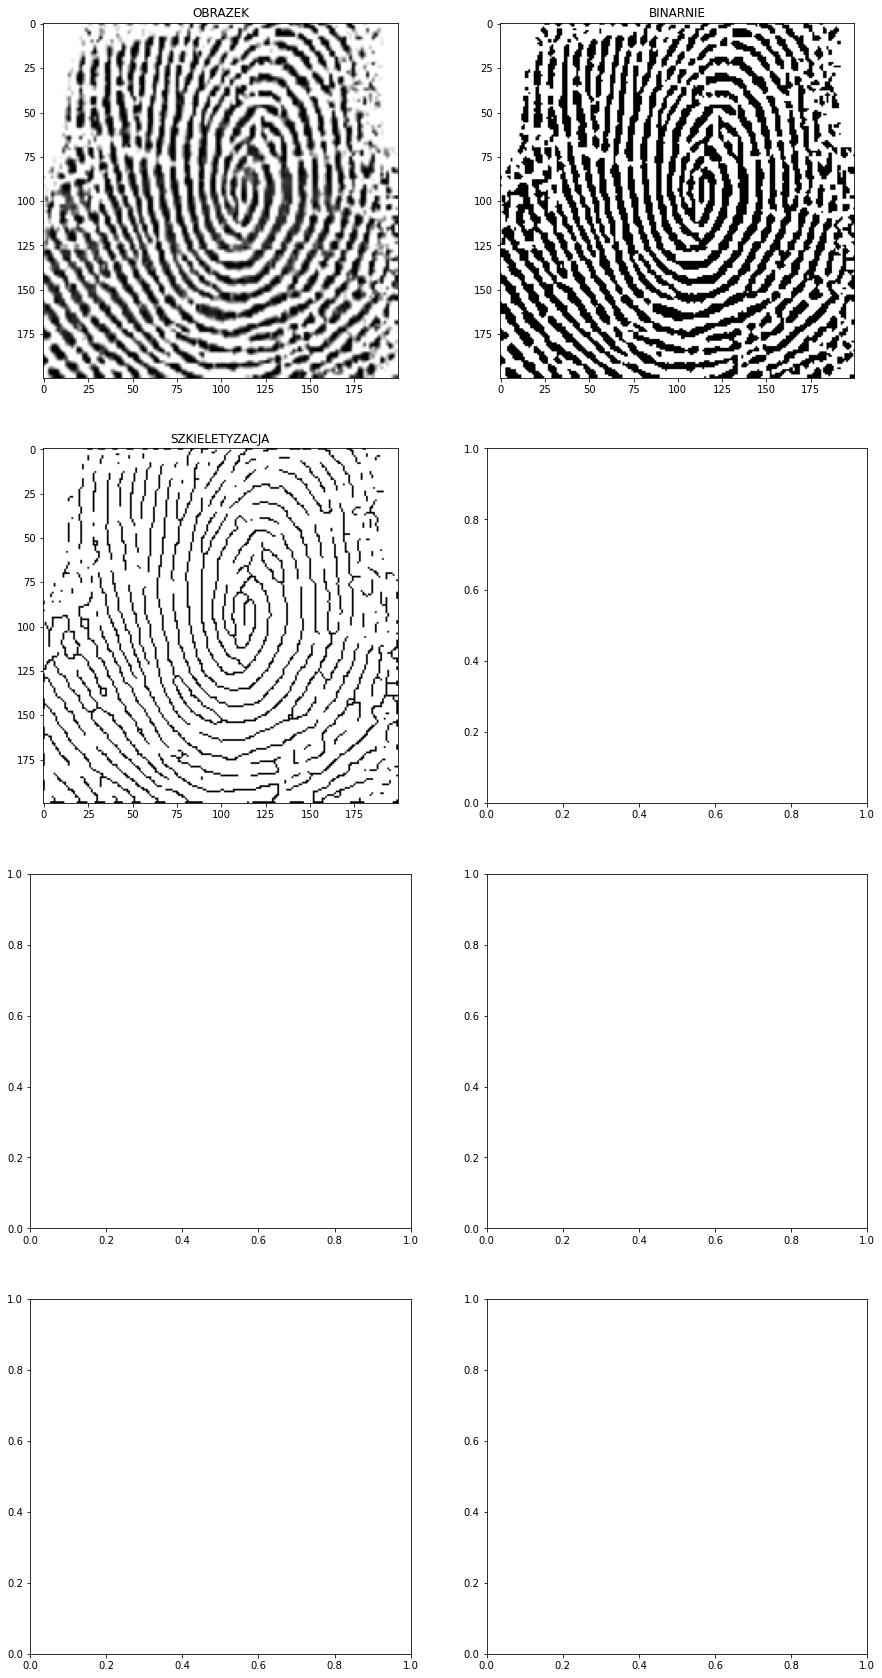

In [133]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

image_path = "..\\..\\..\\..\\DATABASES\\FingerprintColorImageDatabase .v1\\FingerprintColorImageDatabase .v1\\sub7\\71.jpg"
image = cv2.imread(image_path, 0)

fig, axs = plt.subplots(4, 2, figsize=(15,30))

axs[0][0].set_title("OBRAZEK")
axs[0][0].imshow(image, cmap='gray')

image_at = ~cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 25, 5)

axs[0][1].set_title("BINARNIE")
axs[0][1].imshow(image_at, cmap='binary')

image_thinning = cv2.ximgproc.thinning(image_at)

axs[1][0].set_title("SZKIELETYZACJA")
axs[1][0].imshow(image_thinning, cmap='binary')



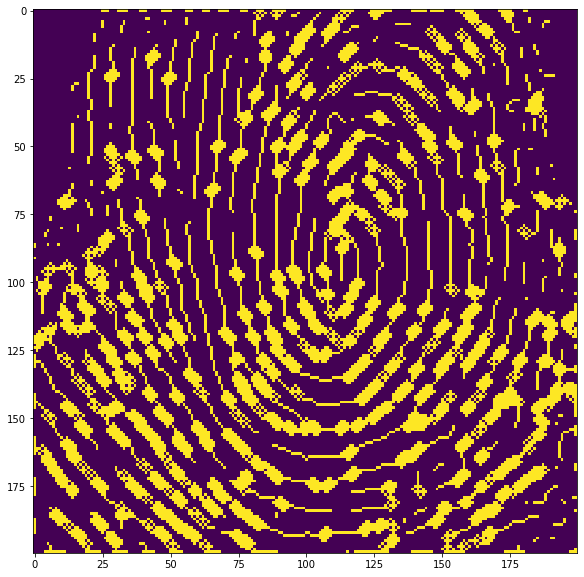

In [111]:
ONE = 255
ZERO = 0

# środkowy czarny
# w sumie cztery -> bifurkacja
# w sumie dwa -> koniec

def search(image):
    copy = np.array(image)
    
    cells = [[-1,-1], [-1,0], [-1,1],
             [0,-1],          [0,1],
             [1,-1],  [1,0],  [1,1]  ]

    for y in range(1, len(image)-1):
        for x in range(1, len(image[0])-1):
            if image[y][x] == ONE:
                values = [image[y + cell[1]][x + cell[0]] for cell in cells]
                # print(values)
                summ = sum(np.array(values)/ONE)
                # print(summ)
                # if summ == 1:
                    # print("ending")
                    # cv2.circle(copy, (x,y), 3, (255, 0, 0))
                if summ == 3:
                    # print("bifurcation")
                    cv2.circle(copy, (x,y), 2, (255, 0, 0))

    return copy


fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(search(image_thinning), interpolation='nearest')

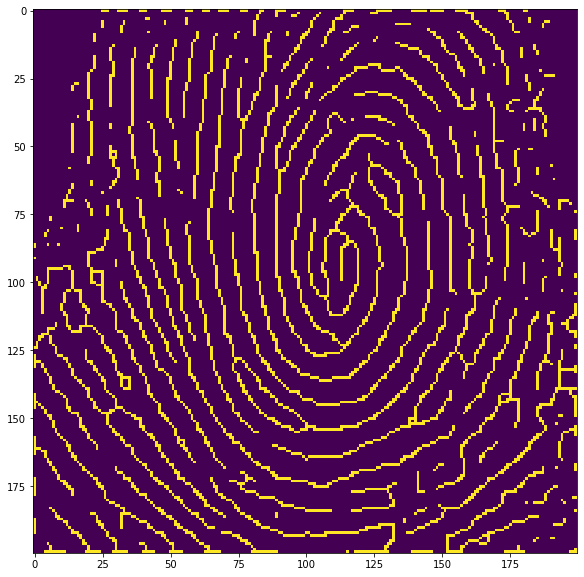

In [112]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(image_thinning, interpolation='nearest')

In [1]:
# implemętnąć K3M